### Run the following code to import any libraries or packages required to run the rest of the script.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

### Run the following chunk of code to generate average velocity vs. adhesion time plots and average velocity probability plots.

The user should adjust the base_Directory variable and pay careful attention to the directory structure of the script. The user may also need to adjust the number_Of_Bins parameter to adjust the number of data points in the plots.

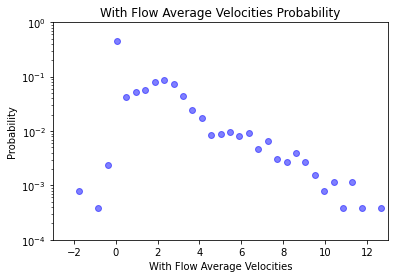

C:\Users\Brandon\anaconda3\envs\tf_GPU_New\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Brandon\anaconda3\envs\tf_GPU_New\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


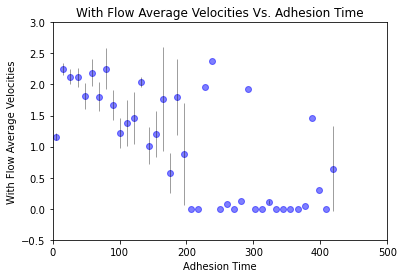

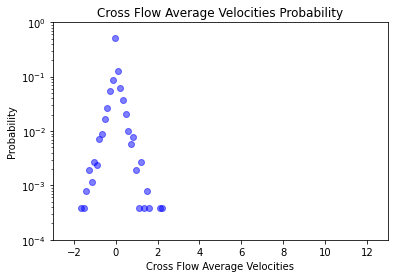

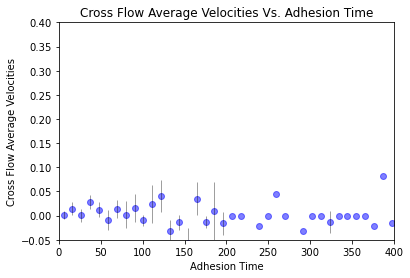

In [2]:
base_Directory = ""
seconds_Per_Frame = 1.2

dynamic_Data = pd.read_csv(base_Directory + "Analysis/Video_Data/Dynamics_Data.csv")

attached_Frames = (dynamic_Data["Frame Detached"] - dynamic_Data["Frame Attached"]) + 1
attached_Times = attached_Frames*seconds_Per_Frame
attached_Times = attached_Times.reset_index(drop = True)

starting_Y_Positions = dynamic_Data["Starting Vertical Position"]
starting_X_Positions = dynamic_Data["Starting Horizontal Position"]
final_Y_Positions = dynamic_Data["Final Vertical Position"]
final_X_Positions = dynamic_Data["Final Horizontal Position"]

y_Changes = final_Y_Positions - starting_Y_Positions
x_Changes = -1*(final_X_Positions - starting_X_Positions)

y_Average_Velocities = [y/t for y,t in zip(y_Changes,attached_Times)]
x_Average_Velocities = [x/t for x,t in zip(x_Changes,attached_Times)]

with_Flow_Max = np.max(x_Average_Velocities)

number_Of_Bins = 40
probability_Weights = np.ones_like(x_Average_Velocities) / len(x_Average_Velocities)
bin_Midpoints = []
bin_Width = int(max(x_Average_Velocities) - min(x_Average_Velocities) + 2)/number_Of_Bins
manual_Bins = np.arange(min(x_Average_Velocities) - 1,max(x_Average_Velocities) + 1,bin_Width)
for i in range(len(manual_Bins) - 1):
    bin_Midpoints.append((manual_Bins[i + 1] + manual_Bins[i])/2)
plt.figure()
counts, manual_Bins = np.histogram(x_Average_Velocities, bins = manual_Bins, weights = probability_Weights)
plt.scatter(bin_Midpoints,counts, facecolor = "blue", edgecolor = "blue", alpha = 0.5)
plt.ylim(10**-4,1)
plt.xlim(-3, 13)
plt.yscale("log")
plt.xlabel("With Flow Average Velocities")
plt.ylabel("Probability")
plt.title("With Flow Average Velocities Probability")
plt.savefig(base_Directory + "Analysis/Outputs/With_Flow_Velocity_Probability_Plot.png")
plt.savefig(base_Directory + "Analysis/Outputs/With_Flow_Velocity_Probability_Plot.svg")
plt.show()

scatter_Values = []
bin_Midpoints = []
bin_Width = int(max(attached_Times) - min(attached_Times) + 2)/number_Of_Bins
manual_Bins = np.arange(min(attached_Times) - 1,max(attached_Times) + 1,bin_Width)
for i in range(len(manual_Bins) - 1):
    bin_Midpoints.append((manual_Bins[i + 1] + manual_Bins[i])/2)

temp_Binning = []
errors = []
for i in range(len(manual_Bins) - 1):
    for j in range(len(attached_Times)):
        if attached_Times[j] > manual_Bins[i] and attached_Times[j] < manual_Bins[i + 1]:
            temp_Binning.append(x_Average_Velocities[j])
    if temp_Binning == []:
        scatter_Values.append(0)
        errors.append(0)
    else:
        scatter_Values.append(np.mean(temp_Binning))
        errors.append(sem(temp_Binning))
    temp_Binning = []
adhesion_Time_Max = np.max(bin_Midpoints)
scatter_Max = np.max(scatter_Values)
plt.figure()
plt.scatter(bin_Midpoints,scatter_Values,facecolor = "blue", edgecolor = "blue", alpha = 0.5)
plt.errorbar(bin_Midpoints,scatter_Values, yerr = errors, fmt = "", ecolor = "black",elinewidth = .75, color = "none", alpha = 0.5)
plt.ylim(-0.5,3)
plt.xlim(0,500)
plt.xlabel("Adhesion Time")
plt.ylabel("With Flow Average Velocities")
plt.title("With Flow Average Velocities Vs. Adhesion Time")
plt.savefig(base_Directory + "Analysis/Outputs/With_Flow_Velocity_Vs_Adhesion_Time.png")
plt.savefig(base_Directory + "Analysis/Outputs/With_Flow_Velocity_Vs_Adhesion_Time.svg")
plt.show()

number_Of_Bins = 40
probability_Weights = np.ones_like(y_Average_Velocities) / len(y_Average_Velocities)

bin_Midpoints = []
bin_Width = int(max(y_Average_Velocities) - min(y_Average_Velocities) + 2)/number_Of_Bins
manual_Bins = np.arange(min(y_Average_Velocities) - 1,max(y_Average_Velocities) + 1,bin_Width)
for i in range(len(manual_Bins) - 1):
    bin_Midpoints.append((manual_Bins[i + 1] + manual_Bins[i])/2)
plt.figure()
counts, manual_Bins = np.histogram(y_Average_Velocities, bins = manual_Bins, weights = probability_Weights)
plt.scatter(bin_Midpoints,counts, facecolor = "blue", edgecolor = "blue", alpha = 0.5)
plt.ylim(10**-4,1)
plt.xlim(-3,13)
plt.yscale("log")
plt.xlabel("Cross Flow Average Velocities")
plt.ylabel("Probability")
plt.title("Cross Flow Average Velocities Probability")
plt.savefig(base_Directory + "Analysis/Outputs/Cross_Flow_Velocity_Probability_Plot.png")
plt.savefig(base_Directory + "Analysis/Outputs/Cross_Flow_Velocity_Probability_Plot.svg")
plt.show()

scatter_Values = []
bin_Midpoints = []
bin_Width = int(max(attached_Times) - min(attached_Times) + 2)/number_Of_Bins
manual_Bins = np.arange(min(attached_Times) - 1,max(attached_Times) + 1,bin_Width)
for i in range(len(manual_Bins) - 1):
    bin_Midpoints.append((manual_Bins[i + 1] + manual_Bins[i])/2)

temp_Binning = []
errors = []
for i in range(len(manual_Bins) - 1):
    for j in range(len(attached_Times)):
        if attached_Times[j] > manual_Bins[i] and attached_Times[j] < manual_Bins[i + 1]:
            temp_Binning.append(y_Average_Velocities[j])
    if temp_Binning == []:
        scatter_Values.append(0)
        errors.append(0)
    else:
        scatter_Values.append(np.mean(temp_Binning))
        errors.append(sem(temp_Binning))
    temp_Binning = []
    
adhesion_Time_Max = np.max(bin_Midpoints)
scatter_Max = np.max(scatter_Values)

plt.figure()
plt.scatter(bin_Midpoints,scatter_Values,facecolor = "blue", edgecolor = "blue", alpha = 0.5)
plt.errorbar(bin_Midpoints,scatter_Values, yerr = errors, fmt = "", ecolor = "black",elinewidth = .75, color = "none", alpha = 0.5)
plt.ylim(-0.05,0.4)
plt.xlim(0,400)
plt.xlabel("Adhesion Time")
plt.ylabel("Cross Flow Average Velocities")
plt.title("Cross Flow Average Velocities Vs. Adhesion Time")
plt.savefig(base_Directory + "Analysis/Outputs/Cross_Flow_Velocity_Vs_Adhesion_Time.png")
plt.savefig(base_Directory + "Analysis/Outputs/Cross_Flow_Velocity_Vs_Adhesion_Time.svg")
plt.show()